# 📊 SECTION 3: EDA (EXPLORATORY DATA ANALYSIS)

This notebook provides comprehensive exploratory data analysis.

In [5]:
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

import sys
from pathlib import Path

# Add project root to path (so we can import src.*)
# Get the directory containing this notebook
notebook_dir = Path.cwd()  # Current working directory (usually notebook's directory)
# If we're in notebooks/, go up one level to project root
if notebook_dir.name == 'notebooks':
# Add project root to path - try multiple methods
    def find_project_root():
        """Find the project root directory."""
        cwd = Path.cwd()
        if cwd.name == 'notebooks' and (cwd.parent / 'src').exists():
            return cwd.parent
        if (cwd / 'src').exists():
            return cwd
        if (cwd.parent / 'src').exists():
            return cwd.parent
        if 'notebooks' in str(cwd):
            parts = cwd.parts
            if 'notebooks' in parts:
                idx = parts.index('notebooks')
                candidate = Path(*parts[:idx])
                if (candidate / 'src').exists():
                    return candidate
        raise FileNotFoundError(f"Cannot find project root. Current dir: {cwd}")

    project_root = find_project_root().resolve()
    sys.path.insert(0, str(project_root))
    from src.data_processing.preprocessing import load_raw_data
    from src.analysis.eda import (
        analyze_missing_values, check_negative_values,
        get_statistical_summary, analyze_state_ids,
        plot_sales_by_year, plot_sales_by_month, generate_eda_report
    )

    print("✅ Setup complete!")

✅ Setup complete!


## Load Data

In [6]:
# Load raw data
df = load_raw_data()
from src.data_processing.preprocessing import convert_period_to_datetime
df = convert_period_to_datetime(df)

print(f"✅ Data loaded: {len(df):,} rows")

📂 Loading from: eia_retail_sales_raw_20251204_100134.csv
✅ Data loaded: 110,484 rows


## Generate EDA Report

In [7]:
# Generate comprehensive EDA report
report = generate_eda_report(df)
print(report)

EXPLORATORY DATA ANALYSIS REPORT

📏 Shape: 110,484 rows × 13 columns
📅 Date range: 2001-01-01 00:00:00 to 2025-09-01 00:00:00

❗ Missing Values: 4 columns
           Missing Count  Missing Percentage
customers          44454           40.235690
price              18414           16.666667
revenue            18414           16.666667
sales              18414           16.666667

❗ Negative values found:
   - revenue: 2 rows

📈 Statistical Summary:
          customers         price       revenue          sales
count  6.603000e+04  92070.000000  92070.000000   92070.000000
mean   2.941145e+06      9.532138    605.435781    6017.077314
std    1.211391e+07      5.244705   2243.927604   21451.082891
min    0.000000e+00      0.000000     -0.000010       0.000000
25%    4.938000e+03      6.730000     30.113017     288.524698
50%    3.030180e+05      8.990000    124.585565    1451.580415
75%    2.046698e+06     11.670000    433.087772    4360.721123
max    1.652490e+08    116.670000  58596.1224

## Visualizations

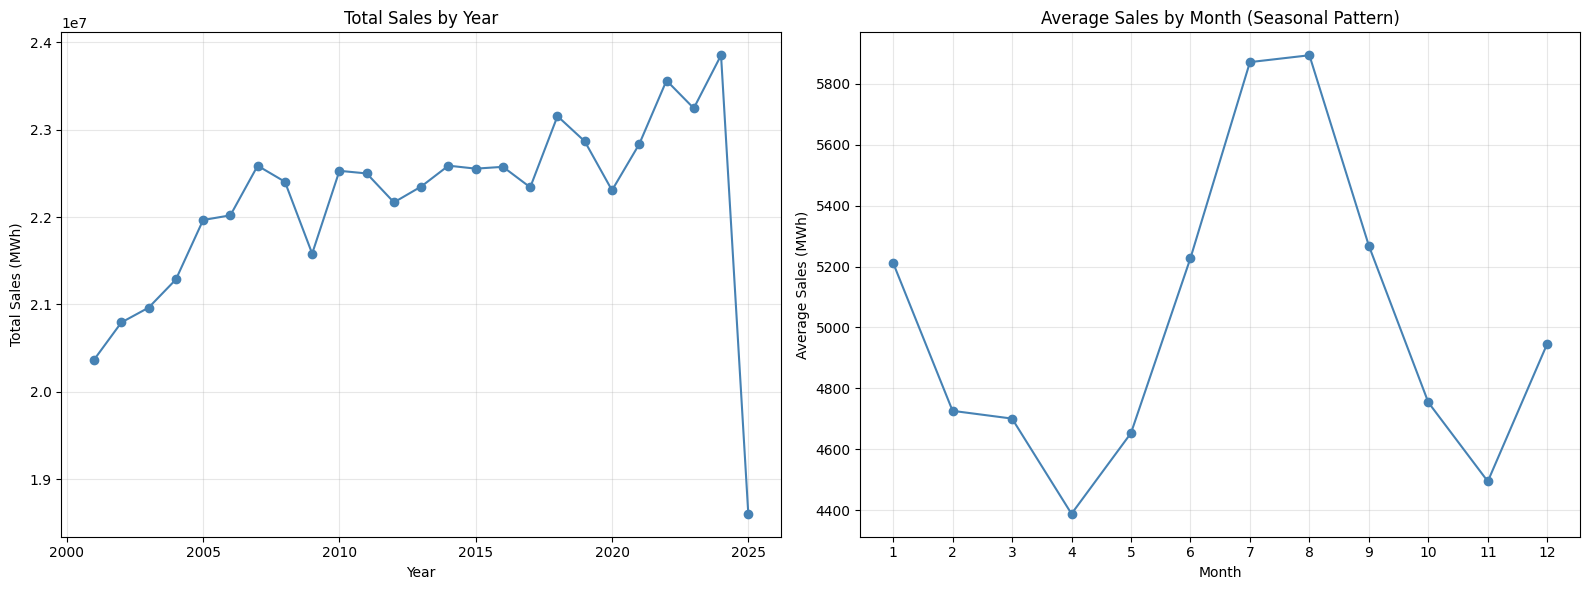

In [8]:
# Create visualizations
from src.data_processing.preprocessing import engineer_features
df_viz = engineer_features(df)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_sales_by_year(df_viz, axes[0])
plot_sales_by_month(df_viz, axes[1])
plt.show()